Análisis de secuencia comparativo de Covid19, MERS, SARS y EBOLA
Compare su secuencia de ADN y la secuencia de proteínas (aminoácidos)
Contenido de GC
Frecuencia de cada aminoácido
Encuentra similitudes entre ellos

Alineación
distancia de martilleo
Estructura 3D de cada uno

Fuente de datos
Latest Sequence: https://www.ncbi.nlm.nih.gov/genbank/sars-cov-2-seqs/
Wuhan-Hu-1: https://www.ncbi.nlm.nih.gov/nuccore/MN908947.3?report=fasta
Covid19: https://www.ncbi.nlm.nih.gov/nuccore/NC_045512.2?report=fasta
SARS:https://www.ncbi.nlm.nih.gov/nuccore/NC_004718.3?report=fasta
MERS:https://www.ncbi.nlm.nih.gov/nuccore/NC_019843.3?report=fasta
EBOLA : https://www.ncbi.nlm.nih.gov/nuccore/NC_002549.1?report=fasta

Archivos PDB
Covid19 : https://www.rcsb.org/3d-view/6LU7
SARS: https://www.rcsb.org/structure/5XES
MERS:
EBOLA:https://www.rcsb.org/structure/6HS4

In [ ]:
!pip install Bio

     |████████████████████████████████| 51kB 4.6MB/s 
     |████████████████████████████████| 2.3MB 14.1MB/s 


In [ ]:
# Load Pkgs
from Bio.Seq import Seq

In [ ]:
# Create our sequence 
seq1 = Seq('ACTCGA')
seq2 = Seq('AC')

Contenido de GC en el ADN
El contenido de GC (o contenido de guanina-citosina) es el porcentaje de bases nitrogenadas en una molécula de ADN o ARN que son guanina (G) o citosina (C)
Utilidad
En los experimentos de reacción en cadena de la polimerasa (PCR), el contenido de GC de oligonucleótidos cortos conocidos como cebadores se usa a menudo para predecir su temperatura de hibridación con el ADN molde.
Un nivel de contenido de GC más alto indica una temperatura de fusión relativamente más alta.
El ADN con bajo contenido de GC es menos estable que el ADN con alto contenido de GC

In [ ]:
from Bio.SeqUtils import GC

In [ ]:
# Method 1 using GC
GC(seq1)

50.0

In [ ]:

# Method 2 using custom fxn
def gc_content(seq):
    result =  float(seq.count('G') + seq.count('C'))/len(seq) * 100
    return result

In [ ]:
gc_content(seq1)

50.0

In [ ]:
def gc_content2(seq):
    gc =  [ N for N in seq if N in 'CG']
    result =  float(len(gc))/len(seq) * 100
    return result

In [ ]:
gc_content2(seq1)

50.0

In [ ]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

Tipos de alineación
Alineación global: encuentra la mejor concordancia / acuerdo entre todos los caracteres en dos secuencias
Alineación local: encuentra solo las subsecuencias que se alinean mejor

In [ ]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

alignments = pairwise2.align.globalxx(seq1,seq2)

print(alignments)
[('ACTCGA', 'A--C--', 2.0, 0, 6), ('ACTCGA', 'AC----', 2.0, 0, 6)]

# To See it well
print(format_alignment(*alignments[0]))

[Alignment(seqA='ACTCGA', seqB='A--C--', score=2.0, start=0, end=6), Alignment(seqA='ACTCGA', seqB='AC----', score=2.0, start=0, end=6)]
ACTCGA
|  |  
A--C--
  Score=2



In [ ]:
# To See second part
print(format_alignment(*alignments[1]))

ACTCGA
||    
AC----
  Score=2



In [ ]:
# To see all alignment together using a loop
for a in alignments:
    print(format_alignment(*a))

ACTCGA
|  |  
A--C--
  Score=2

ACTCGA
||    
AC----
  Score=2



In [ ]:
# Get only the score for one alignments
alignments2 = pairwise2.align.globalxx(seq1,seq2,one_alignment_only=True,score_only=True)

In [ ]:
# Only 2 places
alignments2

2.0

Compruebe la similitud o el porcentaje de similitud
fracción de nucleótidos igual / número total de nucleótidos * 100%

In [ ]:
alignments2/len(seq1)*100

33.33333333333333

Distancia de Hamming: muestra en cuántos lugares difieren 2 cuerdas
La distancia de Hamming entre dos cadenas de igual longitud es el número de posiciones en las que los símbolos correspondientes son diferentes.
En otras palabras, mide el número mínimo de sustituciones necesarias para cambiar una cadena por otra, o la cantidad mínima de errores que podrían haber transformado una cadena en otra.
Se utiliza para la detección o corrección de errores.
Se utiliza para cuantificar la similitud de secuencias de ADN,
Para comprobar la distancia de edición
La distancia de edición es una forma de cuantificar qué tan diferentes son dos cadenas (por ejemplo, palabras) entre sí contando el número mínimo de operaciones necesarias para transformar una cadena en la otra.
por ejemplo, distancia de Levenshtein

In [ ]:
def hamming_distance(lhs,rhs):
    return len([(x,y) for x,y in zip(lhs,rhs) if x != y])

In [ ]:
hamming_distance('ACTTA','ACCTA')

1

In [ ]:
hamming_distance(seq1,seq1[::-1])

4

Gráfica de puntos
Un diagrama de puntos es un método gráfico que permite comparar dos secuencias biológicas e identificar regiones de gran similitud entre ellas.
El método más simple: coloque un punto donde las secuencias sean idénticas
Los gráficos de puntos comparan dos secuencias organizando una secuencia en el eje xy otra en el eje y de un gráfico.
Cuando los residuos de ambas secuencias coinciden en la misma ubicación en el gráfico, se dibuja un punto en la posición correspondiente.
utilidad
Los gráficos de puntos también se pueden utilizar para inspeccionar visualmente secuencias

repeticiones directas o invertidas
regiones con baja complejidad de secuencia.
Regiones similares
Secuencias repetidas
Reordenamientos de secuencia
Estructuras de ARN
Orden de genes
Enlace: https: //stackoverflow.com/questions/40822400/how-to-create-a-dotplot-of-two-dna-sequence-in-python

In [ ]:
def delta(x,y):
    return 0 if x == y else 1


def M(seq1,seq2,i,j,k):
    return sum(delta(x,y) for x,y in zip(seq1[i:i+k],seq2[j:j+k]))


def makeMatrix(seq1,seq2,k):
    n = len(seq1)
    m = len(seq2)
    return [[M(seq1,seq2,i,j,k) for j in range(m-k+1)] for i in range(n-k+1)]


def plotMatrix(M,t, seq1, seq2, nonblank = chr(0x25A0), blank = ' '):
    print(' |' + seq2)
    print('-'*(2 + len(seq2)))
    for label,row in zip(seq1,M):
        line = ''.join(nonblank if s < t else blank for s in row)
        print(label + '|' + line)


def dotplot(seq1,seq2,k = 1,t = 1):
    M = makeMatrix(seq1,seq2,k)
    plotMatrix(M, t, seq1,seq2) #experiment with character choice

In [ ]:
#Hacer un diagrama de puntos
dotplot(seq1,seq2)

 |AC
----
A|■ 
C| ■
T|  
C| ■
G|  
A|■ 


Las proteínas idénticas obviamente tendrán una línea diagonal en el centro de la matriz.

In [ ]:
dotplot(Seq('ACCTAG'),Seq('ACCTAG'))

 |ACCTAG
--------
A|■   ■ 
C| ■■   
C| ■■   
T|   ■  
A|■   ■ 
G|     ■


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

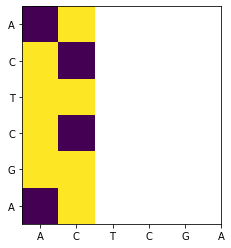

In [ ]:
## Agregue algo de fantasía
plt.imshow(np.array(makeMatrix(seq1,seq2,1)))
xt=plt.xticks(np.arange(len(list(seq1))),list(seq1))
yt=plt.yticks(np.arange(len(list(seq1))),list(seq1))
plt.show()

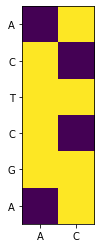

In [ ]:
# Plot 
plt.imshow(np.array(makeMatrix(seq1,seq2,1)))
xt=plt.xticks(np.arange(len(list(seq2))),list(seq2))
yt=plt.yticks(np.arange(len(list(seq1))),list(seq1))
plt.show()

In [ ]:
# Convert to Fxn
def dotplotx(seq1,seq2):
    plt.imshow(np.array(makeMatrix(seq1,seq2,1)))
    # on x-axis list all sequences of seq 2
    xt=plt.xticks(np.arange(len(list(seq2))),list(seq2))
    # on y-axis list all sequences of seq 1
    yt=plt.yticks(np.arange(len(list(seq1))),list(seq1))
    plt.show()

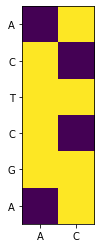

In [ ]:
dotplotx(seq1,seq2)

Análisis comparativo de Covid, SARS, MERS, Ébola
Covid19 (SARS-CoV2) es un nuevo coronavirus identificado como la causa de la enfermedad por coronavirus 2019 (COVID-19) que comenzó en Wuhan, China a fines de 2019 y se extendió por todo el mundo.
MERS (MERS-CoV) se identificó en 2012 como la causa del síndrome respiratorio de Oriente Medio (MERS).
El SARS (SARS-CoV) se identificó en 2002 como la causa de un brote de síndrome respiratorio agudo severo (SARS).

In [ ]:
## Trabajar con secuencias usando archivos fasta
from Bio import SeqIO

In [ ]:
covid = SeqIO.read("/content/sequence.fasta","fasta")
mers = SeqIO.read("/content/sequence (4).fasta","fasta")
sars = SeqIO.read("/content/sequence (3).fasta","fasta")
ebola = SeqIO.read("/content/sequence (5).fasta","fasta")

In [ ]:

covid

SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA'), id='MN908947.3', name='MN908947.3', description='MN908947.3 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome', dbxrefs=[])

In [ ]:
mers

SeqRecord(seq=Seq('GATTTAAGTGAATAGCTTGGCTATCTCACTTCCCCTCGTTCTCTTGCAGAACTT...AAA'), id='NC_019843.3', name='NC_019843.3', description='NC_019843.3 Middle East respiratory syndrome-related coronavirus isolate HCoV-EMC/2012, complete genome', dbxrefs=[])

In [ ]:
sars

SeqRecord(seq=Seq('ATATTAGGTTTTTACCTACCCAGGAAAAGCCAACCAACCTCGATCTCTTGTAGA...AAA'), id='NC_004718.3', name='NC_004718.3', description='NC_004718.3 SARS coronavirus Tor2, complete genome', dbxrefs=[])

In [ ]:

ebola

SeqRecord(seq=Seq('CGGACACACAAAAAGAAAGAAGAATTTTTAGGATCTTTTGTGTGCGAATAACTA...CCA'), id='NC_002549.1', name='NC_002549.1', description='NC_002549.1 Zaire ebolavirus isolate Ebola virus/H.sapiens-tc/COD/1976/Yambuku-Mayinga, complete genome', dbxrefs=[])

In [ ]:
# Convert or Get the sequences
covid_seq = covid.seq
mers_seq = mers.seq
sars_seq = sars.seq
ebola_seq = ebola.seq

In [ ]:

# Check the length of each sequence
print("covid_seq ::",len(covid_seq))
print("mers_seq ::",len(mers_seq))
print("sars_seq ::",len(sars_seq))
print("ebola_seq ::",len(ebola_seq))

covid_seq :: 29903
mers_seq :: 30119
sars_seq :: 29751
ebola_seq :: 18959


In [ ]:

# Check for the GC Content/ Which of them is more heat stable
from Bio.SeqUtils import GC

In [ ]:
# Check the length of each sequence
print("GC content of covid_seq ::",GC(covid_seq))
print("GC content of mers_seq ::",GC(mers_seq))
print("GC content of sars_seq ::",GC(sars_seq))
print("GC content of ebola_seq ::",GC(ebola_seq))

GC content of covid_seq :: 37.97277865097148
GC content of mers_seq :: 41.23642883229855
GC content of sars_seq :: 40.7616550704178
GC content of ebola_seq :: 41.07284139458832


Narativo
Mers es el más estable con un GC de 41,2 seguido de Ébola

In [ ]:
covid_protein = covid_seq.translate()
mers_protein = mers_seq.translate()
sars_protein = sars_seq.translate()
ebola_protein = ebola_seq.translate()

/usr/local/lib/python3.6/dist-packages/Bio/Seq.py:2338: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


In [ ]:
print("covid_protein ::",len(covid_protein))
print("mers_protein ::",len(mers_protein))
print("sars_protein ::",len(sars_protein))
print("ebola_protein ::",len(ebola_protein))

covid_protein :: 9967
mers_protein :: 10039
sars_protein :: 9917
ebola_protein :: 6319


Compruebe el recuento de aminoácidos
ProtParam.ProteinAnalysis
Contador de colecciones

In [ ]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

In [ ]:
# Method 1
covid_analysed = ProteinAnalysis(str(covid_protein))
mers_analysed = ProteinAnalysis(str(mers_protein))
sars_analysed = ProteinAnalysis(str(sars_protein))
ebola_analysed = ProteinAnalysis(str(ebola_protein))

In [ ]:
# Check for the Frequence of AA
covid_analysed.count_amino_acids()

{'A': 375,
 'C': 635,
 'D': 290,
 'E': 270,
 'F': 593,
 'G': 394,
 'H': 332,
 'I': 436,
 'K': 413,
 'L': 886,
 'M': 117,
 'N': 472,
 'P': 292,
 'Q': 325,
 'R': 558,
 'S': 810,
 'T': 679,
 'V': 548,
 'W': 263,
 'Y': 505}

In [ ]:

# Method 2
# cual es la frecuencia de aminoacidos
from collections import Counter

In [ ]:
# Most common amino acid in Covid
covid_freq = Counter(covid_protein)
mers_freq = Counter(mers_protein)
sars_freq = Counter(sars_protein)
ebola_freq = Counter(ebola_protein)

In [ ]:
covid_freq

Counter({'*': 774,
         'A': 375,
         'C': 635,
         'D': 290,
         'E': 270,
         'F': 593,
         'G': 394,
         'H': 332,
         'I': 436,
         'K': 413,
         'L': 886,
         'M': 117,
         'N': 472,
         'P': 292,
         'Q': 325,
         'R': 558,
         'S': 810,
         'T': 679,
         'V': 548,
         'W': 263,
         'Y': 505})

In [ ]:
# Most common amino acid in Covid
Counter(covid_protein).most_common(10)

[('L', 886),
 ('S', 810),
 ('*', 774),
 ('T', 679),
 ('C', 635),
 ('F', 593),
 ('R', 558),
 ('V', 548),
 ('Y', 505),
 ('N', 472)]

In [ ]:
# Most common amino acid in mers
Counter(mers_protein).most_common(10)

[('L', 1711),
 ('S', 852),
 ('*', 689),
 ('V', 651),
 ('I', 565),
 ('T', 564),
 ('R', 520),
 ('C', 506),
 ('F', 453),
 ('A', 418)]

In [ ]:
# Most common amino acid in sars
Counter(sars_protein).most_common(10)

[('L', 1368),
 ('S', 737),
 ('T', 689),
 ('V', 683),
 ('A', 575),
 ('I', 566),
 ('K', 503),
 ('G', 438),
 ('F', 437),
 ('N', 418)]

In [ ]:
# Most common amino acid in ebola
Counter(ebola_protein).most_common(10)

[('L', 662),
 ('S', 623),
 ('R', 437),
 ('T', 384),
 ('I', 371),
 ('K', 344),
 ('Q', 330),
 ('N', 294),
 ('P', 288),
 ('A', 280)]

<BarContainer object of 21 artists>

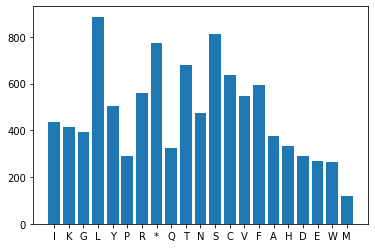

In [ ]:
# Plot the Amino Acids
plt.bar(covid_freq.keys(), covid_freq.values())

<BarContainer object of 21 artists>

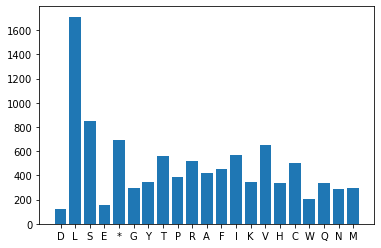

In [ ]:
# plot of amino acids
plt.bar(mers_freq.keys(), mers_freq.values())

<BarContainer object of 21 artists>

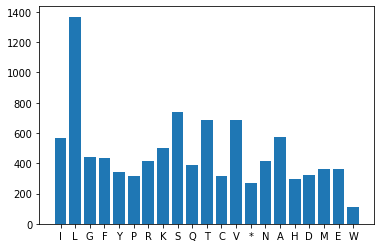

In [ ]:
# plot of amino acids
plt.bar(sars_freq.keys(), sars_freq.values())

<BarContainer object of 21 artists>

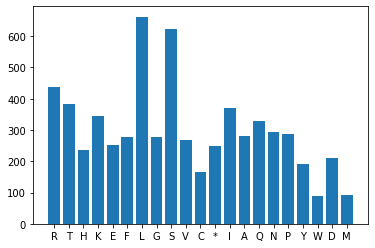

In [ ]:
# plot of amino acids
plt.bar(ebola_freq.keys(), ebola_freq.values())

erifique los pesos moleculares
Es necesario eliminar los codones de parada * para obtener los pesos moleculares.

In [ ]:

#print("Molecular weights:: covid_analysed ",covid_analysed.molecular_weight())
#print("Molecular weights:: mers_analysed  ",mers_analysed.molecular_weight())
#rint("Molecular weights:: sars_analysed  ",sars_analysed.molecular_weight())
#print("Molecular weights:: ebola_analysed ",ebola_analysed.molecular_weight())


In [ ]:
dotplot(covid_seq[0:10],mers_seq[0:10])

 |GATTTAAGTG
------------
A| ■   ■■   
T|  ■■■   ■ 
T|  ■■■   ■ 
A| ■   ■■   
A| ■   ■■   
A| ■   ■■   
G|■      ■ ■
G|■      ■ ■
T|  ■■■   ■ 
T|  ■■■   ■ 


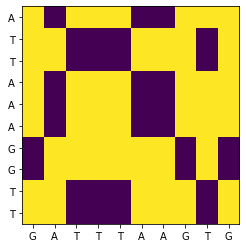

In [ ]:
# Compare Covid and Mers
dotplotx(covid_seq[0:10],mers_seq[0:10])

In [ ]:
# Compare Covid and sars
dotplot(covid_seq[0:10],sars_seq[0:10])

 |ATATTAGGTT
------------
A|■ ■  ■    
T| ■ ■■   ■■
T| ■ ■■   ■■
A|■ ■  ■    
A|■ ■  ■    
A|■ ■  ■    
G|      ■■  
G|      ■■  
T| ■ ■■   ■■
T| ■ ■■   ■■


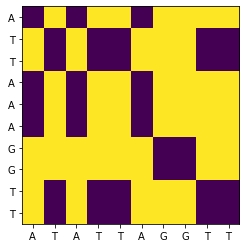

In [ ]:

# Compare Covid and sars
dotplotx(covid_seq[0:10],sars_seq[0:10])

# Alineación por pares para los primeros 100 nucleótidos

In [ ]:
cov_n_sars = pairwise2.align.globalxx(covid_seq[0:100],sars_seq[0:100],one_alignment_only=True,score_only=True)

In [ ]:
cov_n_sars

89.0

In [ ]:

# Percentage of similarity between them
cov_n_sars/len(covid_seq[0:100]) * 100

89.0

In [ ]:
# Alineación por pares para los primeros 100 nucleótidos
cov_n_mers = pairwise2.align.globalxx(covid_seq[0:100],mers_seq[0:100],one_alignment_only=True,score_only=True)

cov_n_mers

71.0

In [ ]:
# Porcentaje de similitud entre ellos
cov_n_mers/len(covid_seq[0:100]) * 100

71.0

In [ ]:
# Pairwise alignment for the first 100 nucleotide
cov_n_ebola = pairwise2.align.globalxx(covid_seq[0:100],ebola_seq[0:100],one_alignment_only=True,score_only=True)

In [ ]:
cov_n_ebola

58.0

Narativo
Covid19 y SARS tienen un 89% de similitud, ambos son del mismo género y pertenecen a Sars_Cov
Covid y Ébola tienen una similitud del 58% ya que son totalmente de diferentes familias de virus
Estructura 3D

In [ ]:
# 3D Structure
from Bio.PDB import PDBParser,MMCIFParser

In [ ]:
parser = PDBParser()

In [ ]:
covid_structure = parser.get_structure("6LU7","/content/6lu7.pdb")

/usr/local/lib/python3.6/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2809.
  PDBConstructionWarning,


In [ ]:
covid_structure

<Structure id=6LU7>

In [ ]:
len(covid_structure)

1

In [ ]:
sars_structure = parser.get_structure("5xes", "/content/5xes.pdb")
mers_structure = parser.get_structure("6pxh", "/content/6pxh.pdb")
ebola_structure = parser.get_structure("6hs4", "/content/6hs4.pdb")

/usr/local/lib/python3.6/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 25792.
  PDBConstructionWarning,
/usr/local/lib/python3.6/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 25872.
  PDBConstructionWarning,
/usr/local/lib/python3.6/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 25961.
  PDBConstructionWarning,
/usr/local/lib/python3.6/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 25971.
  PDBConstructionWarning,
/usr/local/lib/python3.6/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 25976.
  PDBConstructionWarning,
/usr/local/lib/python3.6/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 26192.
  PDBC

In [ ]:
len(sars_structure)

20

In [ ]:
len(ebola_structure)

1

In [ ]:
!pip install nglview

     |████████████████████████████████| 5.2MB 13.5MB/s 
  Created wheel for nglview: filename=nglview-2.7.7-cp36-none-any.whl size=6983522 sha256=8f18ffd409e0bd63b54abb0ca989bf02489583abef261201528168f862e86e37
  Stored in directory: /root/.cache/pip/wheels/24/14/56/fc0406301850d9d017a748b568b2e97566148deda046ac56dc
Successfully built nglview


In [ ]:
import nglview as nv


In [ ]:
view_covid =  nv.show_biopython(covid_structure)

In [ ]:

view_covid

NGLWidget()

In [ ]:
view_mers =  nv.show_biopython(mers_structure)

view_mers

NGLWidget()

In [ ]:

view_sars =  nv.show_biopython(sars_structure)

In [ ]:
view_sars

NGLWidget()

In [ ]:
view_ebola =  nv.show_biopython(ebola_structure)

In [ ]:

view_ebola

NGLWidget()

In [ ]:
!pip install pytraj
import warnings
warnings.filterwarnings('ignore') # make the notebook nicer
from __future__ import print_function

import pytraj as pt
import nglview as nv

print("nglview version = {}".format(nv.__version__))
print("pytraj version = {}".format(pt.__version__))



nglview version = 2.7.7
pytraj version = 2.0.5


In [ ]:
traj = pt.load('/content/5xes.pdb')
view = nv.show_pytraj(traj)
view

NGLWidget(max_frame=19)

In [ ]:
view._display_image()

In [ ]:
from IPython.display import IFrame

IFrame(src="view.html", width=700, height=700)